## Introduction : Credit Card Fraud Detection

####  Consumers and financial organizations are both impacted negatively by credit card fraud, which is a severe issue. Both the cardholder and the card issuer may suffer cash losses as a consequence of fraudulent transactions, in addition to reputational harm. Therefore, it is crucial to identify and stop credit card fraud. Machine learning and statistical methods are used in credit card fraud detection to spot bogus transactions. On the basis of previous transaction data, machine learning models are taught to identify patterns and traits that distinguish between fraudulent and genuine transactions. The classification of new transactions as fraudulent or lawful is then done using these models.


## Importing dependencies

In [1]:
import numpy as np  # Importing the NumPy library and renaming it to "np"
import pandas as pd  # Importing the Pandas library and renaming it to "pd"
import matplotlib.pyplot as plt  # Importing the Pyplot module from the Matplotlib library and renaming it to "plt"
import seaborn as sns  # Importing the Seaborn library and renaming it to "sns"
%matplotlib inline  

In [2]:
# "creditcard.csv" located in the "Downloads" folder of the user "niraj" using the pandas library and assigning it to a variable named "ccfd_df"
ccfd_df = pd.read_csv(r"C:\Users\niraj\Downloads\creditcard.csv\creditcard.csv")

In [3]:
ccfd_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
ccfd_df.shape

(284807, 31)

## Preprocessing 
### * Handle missing data
### * Handle duplicates
### * Handle outliers
### * Feature scaling/Normalization
### * Feature Encoding


In [5]:
# counting the number of missing values (NaN or Null) in each column of a pandas dataframe ccfd_df.
ccfd_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Checking for duplicates
duplicates = ccfd_df.duplicated()

# Printing the number of duplicates
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 1081


In [7]:
# Printing the duplicate rows
print("Duplicate rows:", ccfd_df[duplicates])

Duplicate rows:             Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7       

In [8]:
ccfd_df[110:120]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110,73.0,0.925997,-0.358099,1.376722,1.900769,-1.057690,0.301885,-0.462266,0.250424,1.253958,...,-0.347567,-0.676807,0.100568,0.595989,0.322122,-0.547495,0.078786,0.043819,70.60,0
111,73.0,1.148187,0.085837,0.120702,1.126665,0.214711,0.537381,-0.049989,0.186175,0.111781,...,-0.091112,-0.095475,-0.166750,-0.653433,0.713020,-0.288035,0.031507,0.000372,19.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
116,75.0,-1.439069,0.267631,3.562770,3.481486,-1.160101,1.764781,-0.558817,0.442019,0.348431,...,0.129257,1.129282,-0.006978,0.497337,0.130515,0.525668,-0.088950,0.113206,81.13,0
117,76.0,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,...,0.315868,0.847565,0.148877,0.549791,-0.585131,0.325841,-0.068871,0.059713,50.00,0
118,76.0,-0.997176,0.228365,1.715340,-0.420067,0.560838,0.564725,0.846047,0.197491,-0.097202,...,-0.070241,0.015445,0.072651,-0.272272,-0.087682,0.138132,0.125902,-0.063022,86.43,0
119,77.0,-1.165722,1.485337,0.156418,0.924378,0.131746,0.996965,-0.167117,1.262617,-0.584844,...,0.314752,1.046648,0.156404,-0.628123,-0.702367,-0.224025,0.145425,0.116398,11.83,0


In [9]:
#creating a new DataFrame called new_ccfd that contains the same columns as ccfd_df, but with any duplicate rows removed.
new_ccfd = ccfd_df.drop_duplicates()

In [10]:
#checking the difference again after removing duplicates value
ccfd_df.shape, new_ccfd.shape

((284807, 31), (283726, 31))

In [11]:
len(ccfd_df) - len(new_ccfd)

1081

<Axes: xlabel='Amount'>

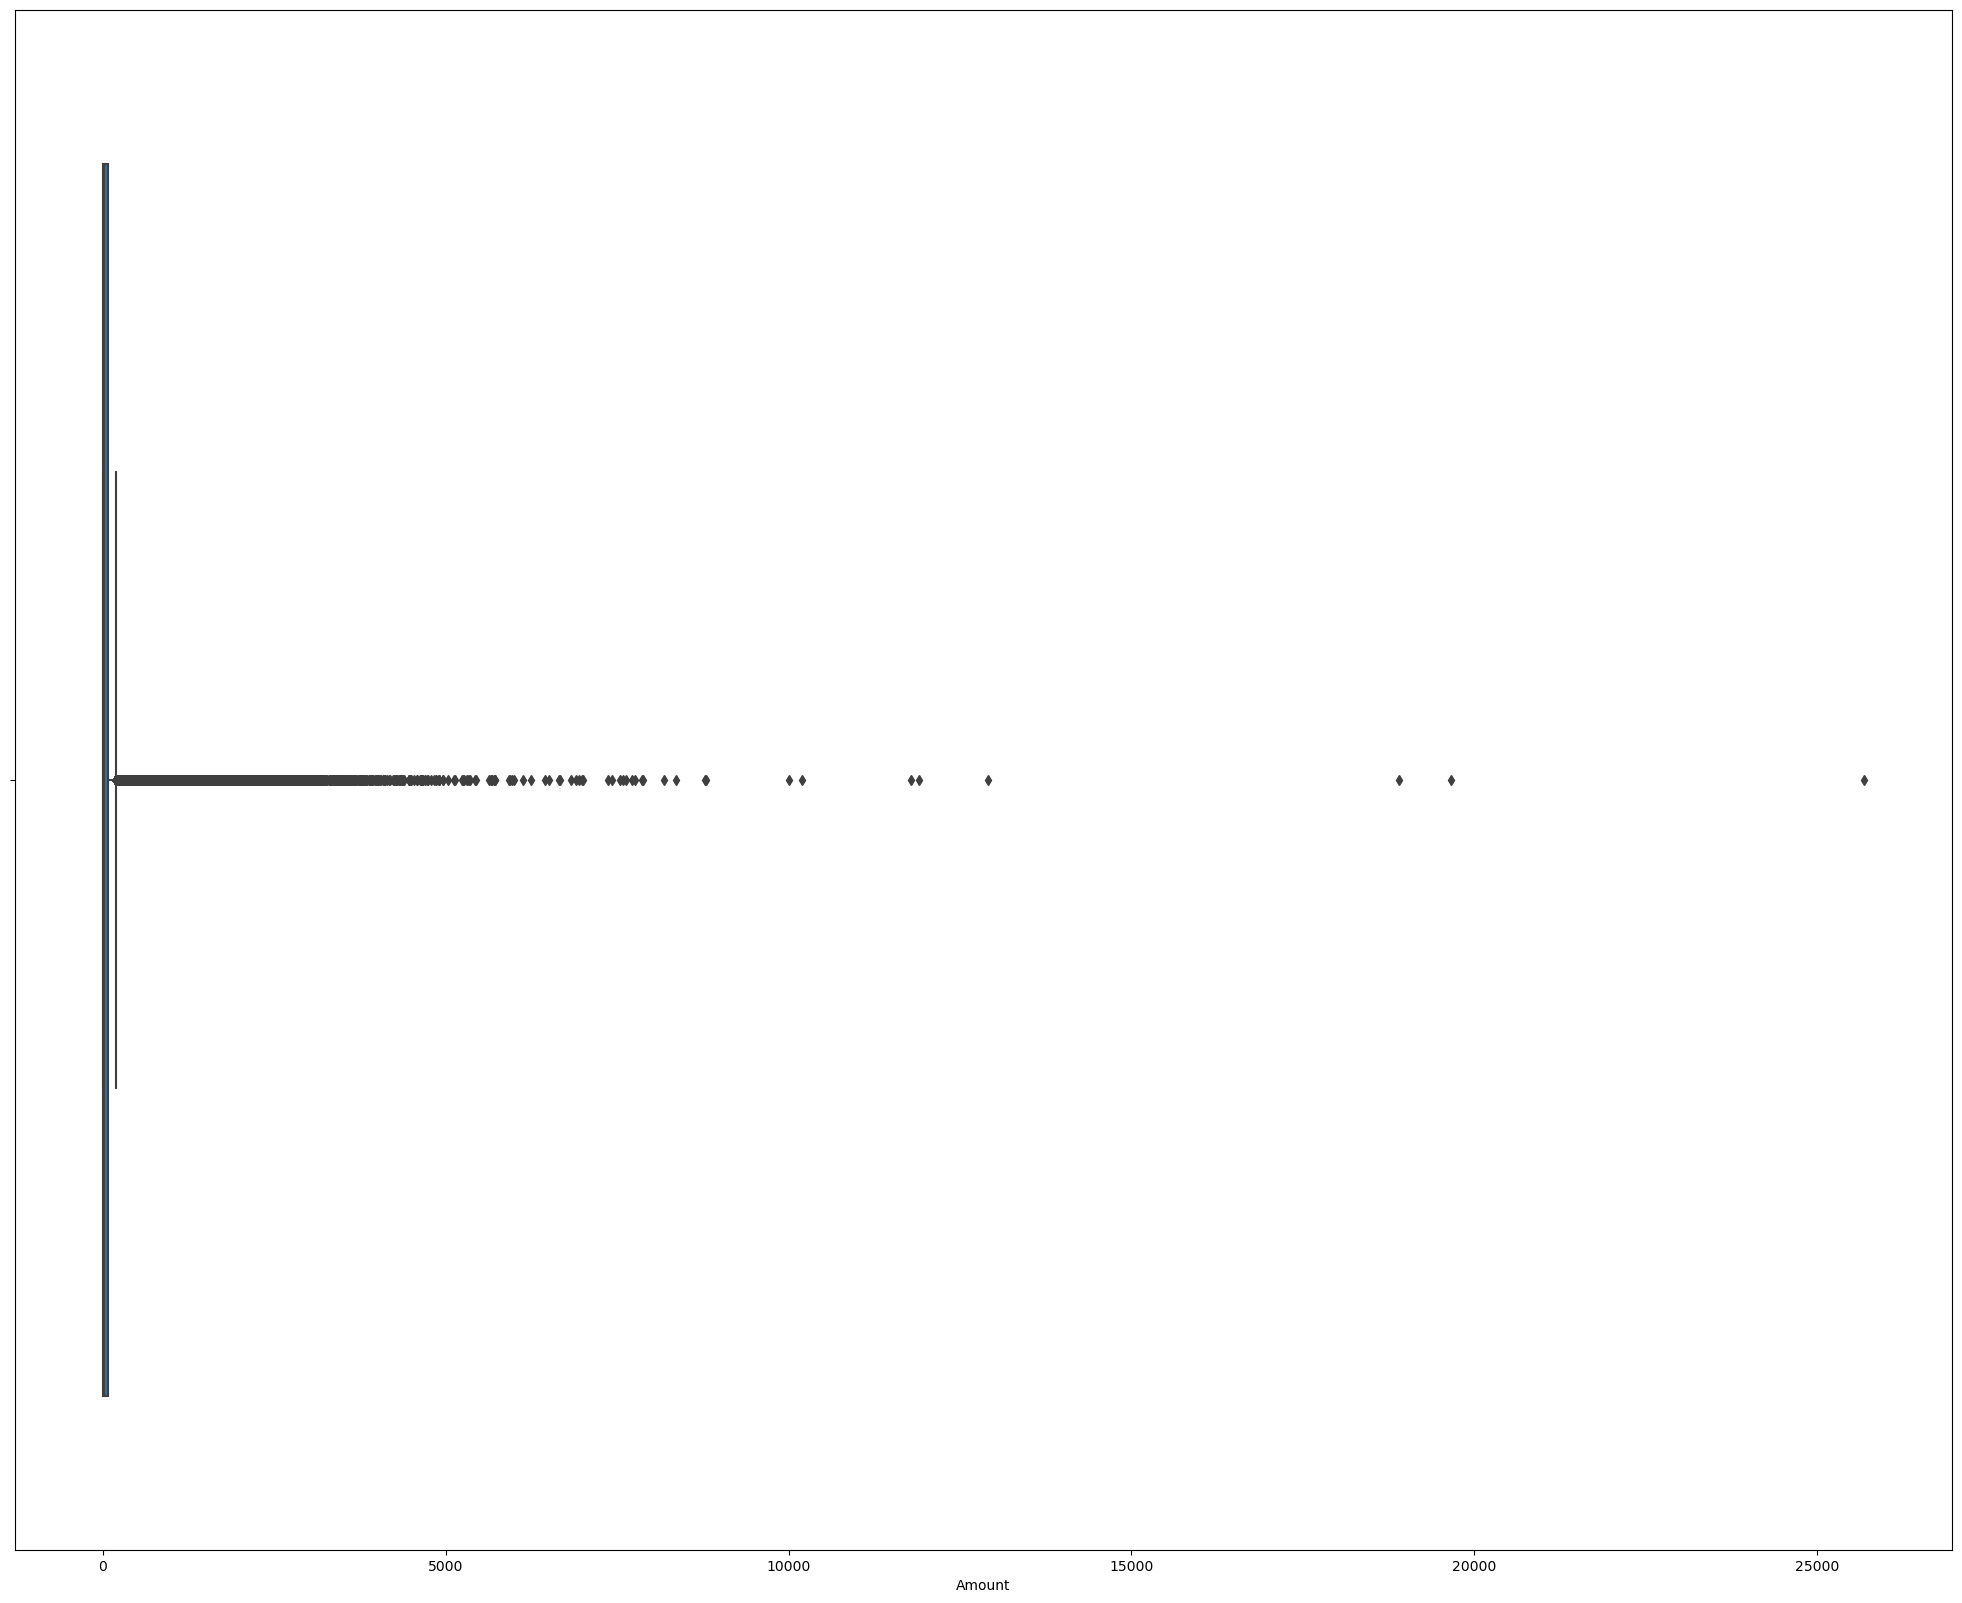

In [12]:
#plotting box plot for amount column
plt.figure(figsize=(25,20))
sns.boxplot(x=new_ccfd["Amount"])

In [13]:
# selecting the column that we want to check for outliers
data = new_ccfd['Amount']
# calculating the Z-score for each data point
z_scores = np.abs((data - data.mean()) / data.std())

# setting a threshold for identifying outliers (e.g., 3 times standard deviations away from the mean)
threshold = 3

# identify the outliers (data points with a Z-score greater than the threshold)
outliers = new_ccfd[z_scores > threshold]

# printing the outliers
print(outliers)

            Time        V1         V2         V3        V4         V5  \
51          36.0 -1.004929  -0.985978  -0.038039  3.710061  -6.631951   
89          59.0 -0.773293  -4.146007  -0.932038  0.027094  -1.698307   
140         87.0 -5.101877   1.897022  -3.458034 -1.277543  -5.517758   
150         93.0 -1.640014  -0.479831   1.613630  2.997979  -3.803788   
164        103.0 -6.093248 -12.114213  -5.694973  3.294389  -1.413792   
...          ...       ...        ...        ...       ...        ...   
284249  172273.0 -9.030538 -11.112584 -16.233798  3.592021 -40.427726   
284290  172305.0  0.311762  -2.602832  -2.942923  1.880832  -0.090804   
284383  172397.0 -0.065120  -4.114668  -2.106854 -0.137339  -1.384530   
284497  172498.0 -0.801222  -4.874934  -3.195666  1.177224  -1.299393   
284528  172527.0  0.643223  -3.380753  -3.890511 -0.386292  -0.266371   

               V6         V7        V8        V9  ...       V21       V22  \
51       5.122103   4.371691 -2.006868 -0.2787

In [14]:
# calculating the interquartile range (IQR) for outliers in the column Amount
def_df = new_ccfd['Amount']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# defining a threshold multiplier for outliers
threshold_multiplier = 1.5

# creating a boolean mask for outlier detection
outlier_mask = (def_df < Q1 - threshold_multiplier * IQR) | (def_df > Q3 + threshold_multiplier * IQR)

# counting the number of outliers
num_outliers = outlier_mask.sum().sum()

print("Number of outliers:", num_outliers)


Number of outliers: 31685


###  In credit card fraud detection, outliers could represent legitimate transactions that are unusual or fraudulent transactions that require further investigation. Hence we will take the outliers in the study and continue exploring more.

In [15]:
from sklearn.preprocessing import StandardScaler
# creating a StandardScaler object
scaler = StandardScaler()
# fitting the scaler on the Time column
scaler.fit(new_ccfd['Time'].values.reshape(-1, 1))
# transforming the Time column
new_ccfd['time_scaled'] = scaler.transform(new_ccfd['Time'].values.reshape(-1, 1))

C:\Users\niraj\AppData\Local\Temp\ipykernel_16996\797623849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ccfd['time_scaled'] = scaler.transform(new_ccfd['Time'].values.reshape(-1, 1))


In [16]:
from sklearn.preprocessing import MinMaxScaler
# creating a MinMaxScaler object
scaler = MinMaxScaler()
# fitting and transforming the 'amount' column using MinMaxScaler
new_ccfd['amount_normalized'] = scaler.fit_transform(new_ccfd[['Amount']])
# dropping the original 'amount' column
new_ccfd.drop('Amount', axis=1, inplace=True)

C:\Users\niraj\AppData\Local\Temp\ipykernel_16996\3660445940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ccfd['amount_normalized'] = scaler.fit_transform(new_ccfd[['Amount']])
C:\Users\niraj\AppData\Local\Temp\ipykernel_16996\3660445940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ccfd.drop('Amount', axis=1, inplace=True)


In [17]:
new_ccfd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,time_scaled,amount_normalized
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996823,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996823,0.000105
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996802,0.014739
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996802,0.004807
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996781,0.002724


In [18]:
#counting all the unique values in the column 'Class'
new_ccfd['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [19]:
# creating a new DataFrame ccfd_valid_df and ccfd_fraud_df that contains only the rows from the original DataFrame ccfd_df where the "Class" column has a value of 0 and 1.
ccfd_valid_df = new_ccfd[ccfd_df.Class==0]
ccfd_fraud_df = new_ccfd[ccfd_df.Class==1]

C:\Users\niraj\AppData\Local\Temp\ipykernel_16996\4089341172.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ccfd_valid_df = new_ccfd[ccfd_df.Class==0]
C:\Users\niraj\AppData\Local\Temp\ipykernel_16996\4089341172.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ccfd_fraud_df = new_ccfd[ccfd_df.Class==1]


In [20]:
# checking the shape of new Dataframe
ccfd_valid_df.shape, ccfd_fraud_df.shape

((283253, 32), (473, 32))

In [21]:
ccfd_valid_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,time_scaled,amount_normalized
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0,283253.000000,283253.000000
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,0.0,0.000505,0.003441
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,0.0,0.999886,0.009746
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0,-1.996823,0.000000
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,0.0,-0.854618,0.000221
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,0.0,-0.212718,0.000856
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,0.0,0.937153,0.003015
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,0.0,1.642362,1.000000


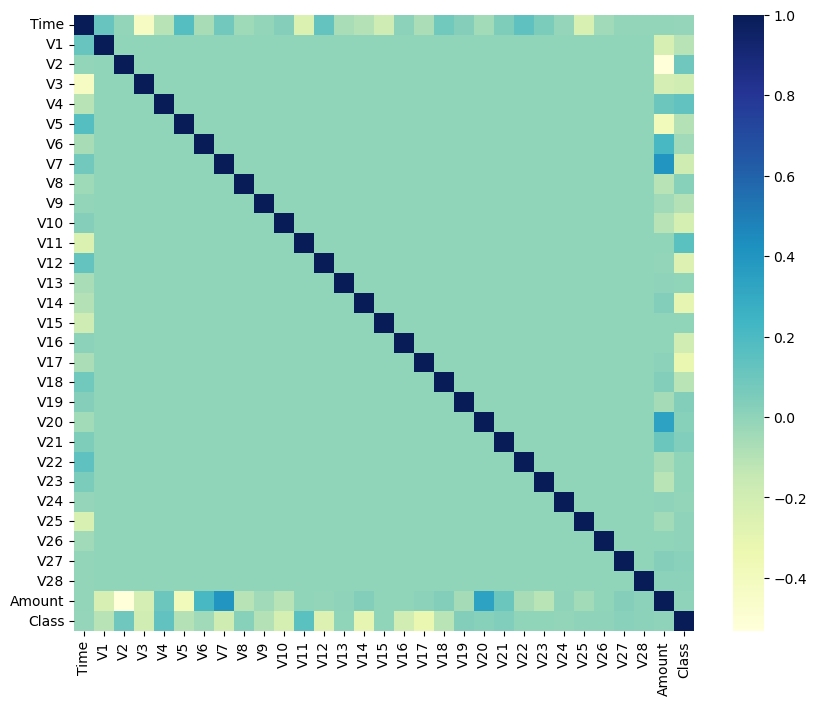

In [22]:
# Computing correlation matrix
corr = ccfd_df.corr()
# Setting the figure size
plt.figure(figsize=(10, 8))
# Plotting the heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

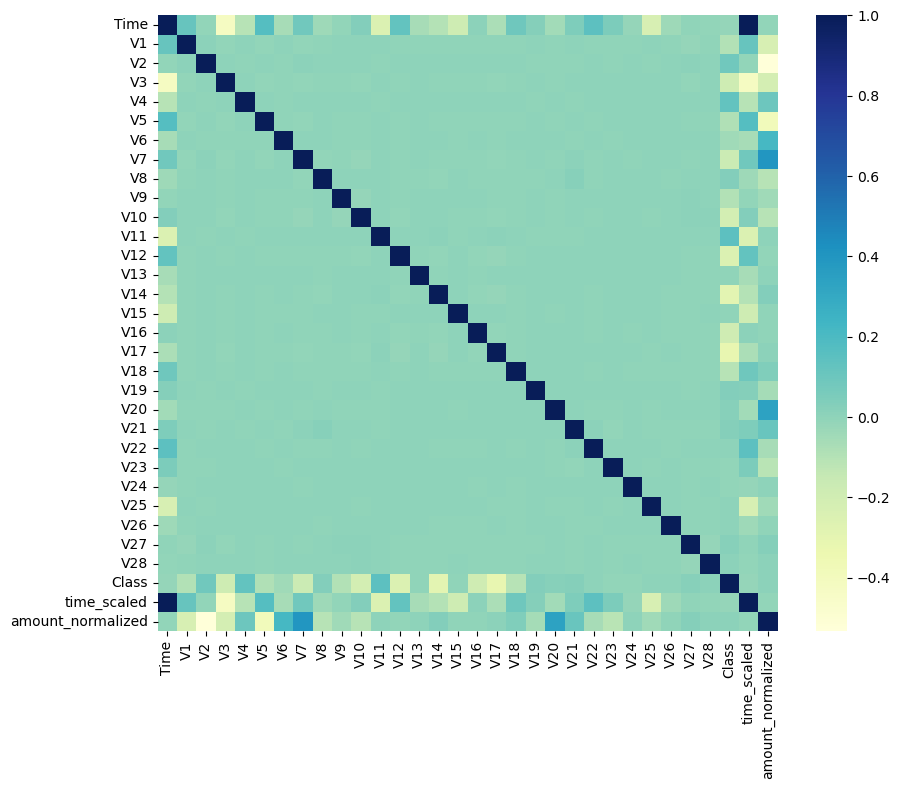

In [23]:
# Computing correlation matrix
corr = new_ccfd.corr()
# Setting the figure size
plt.figure(figsize=(10, 8))
# Plotting the heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

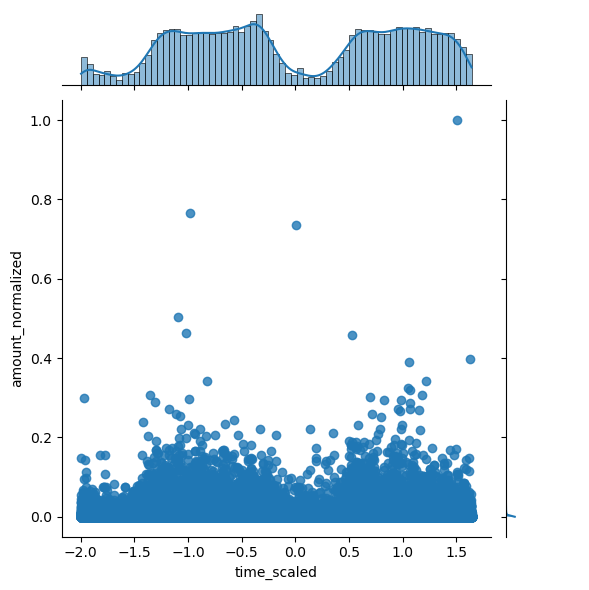

In [24]:
# visualize the relationship between the "time_scaled" and "amount_normalized" variables in the "ccfd_valid_df" dataset.
sns.jointplot(x='time_scaled',y='amount_normalized',data=ccfd_valid_df,kind='reg')

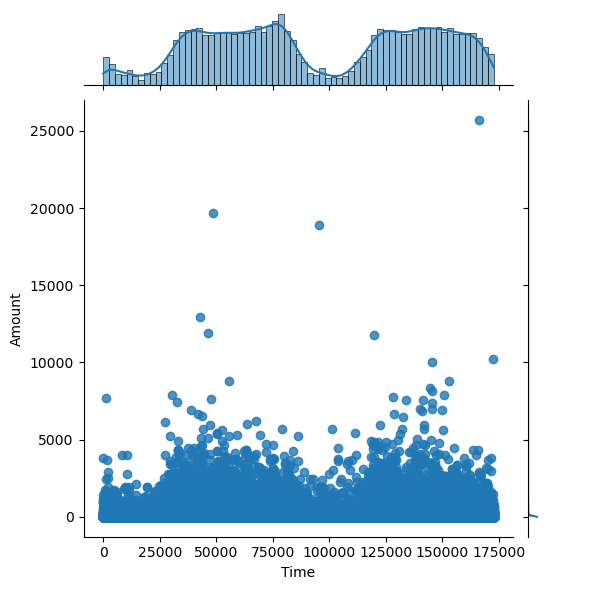

In [25]:
# visualize the relationship between the "Time" and "Amount" variables in the "ccfd_df" dataset.
sns.jointplot(x='Time',y='Amount',data=ccfd_df,kind='reg')

# Handling imbalance dataset 

## By under-sampling method

In [26]:
# creating a DataFrame 'ccfd_valid_sampling' containing a random subset of 473 rows from the original ccfd_valid_df DataFrame
ccfd_valid_sampling = ccfd_valid_df.sample(n=473)

In [27]:
# checking the first few rowsof newly created DataFrame 'ccfd_valid_sampling'
ccfd_valid_sampling.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,time_scaled,amount_normalized
50795,44655.0,1.099819,-0.510382,1.049265,0.080317,-1.108101,-0.085769,-0.726782,0.175471,1.029812,...,0.006855,0.057886,0.147534,-0.018608,1.025483,-0.032542,0.020249,0,-1.056341,0.001985
161282,114054.0,1.874390,0.402011,-0.134651,4.018336,0.143818,0.413085,-0.151661,0.028766,-0.438253,...,0.626978,0.148483,1.180400,0.108590,0.072374,-0.000674,-0.034024,0,0.405277,0.000059
31613,36434.0,-2.644619,-1.037015,1.250218,0.304238,1.545184,0.232761,-0.001345,0.448386,0.056055,...,0.119915,1.708548,-0.672565,-0.094408,0.267751,0.766530,-0.116984,0,-1.229484,0.000139
159600,112707.0,2.010900,-0.150242,-0.775579,0.577926,-0.303324,-0.920869,-0.052943,-0.272217,0.665348,...,0.102392,0.196580,0.016387,-0.173393,0.224608,-0.036938,-0.050415,0,0.376907,0.000658
253647,156345.0,1.865955,0.087593,-0.323489,3.432077,0.365848,1.468207,-0.720921,0.456585,-0.410193,...,0.672949,0.060540,-0.250518,-0.120232,0.110260,-0.004645,-0.045245,0,1.295970,0.000777


In [28]:
# Comparing the size of valid and fraud DataFrame
ccfd_valid_sampling.shape, ccfd_fraud_df.shape

((473, 32), (473, 32))

In [29]:
# now the shape of valid and fraud DataFrame are equal we will concat the two different dataframe into one.
final_df = pd.concat([ccfd_valid_sampling, ccfd_fraud_df], axis = 0)

In [30]:
final_df.shape

(946, 32)

In [31]:
final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,time_scaled,amount_normalized
50795,44655.0,1.099819,-0.510382,1.049265,0.080317,-1.108101,-0.085769,-0.726782,0.175471,1.029812,...,0.006855,0.057886,0.147534,-0.018608,1.025483,-0.032542,0.020249,0,-1.056341,0.001985
161282,114054.0,1.874390,0.402011,-0.134651,4.018336,0.143818,0.413085,-0.151661,0.028766,-0.438253,...,0.626978,0.148483,1.180400,0.108590,0.072374,-0.000674,-0.034024,0,0.405277,0.000059
31613,36434.0,-2.644619,-1.037015,1.250218,0.304238,1.545184,0.232761,-0.001345,0.448386,0.056055,...,0.119915,1.708548,-0.672565,-0.094408,0.267751,0.766530,-0.116984,0,-1.229484,0.000139
159600,112707.0,2.010900,-0.150242,-0.775579,0.577926,-0.303324,-0.920869,-0.052943,-0.272217,0.665348,...,0.102392,0.196580,0.016387,-0.173393,0.224608,-0.036938,-0.050415,0,0.376907,0.000658
253647,156345.0,1.865955,0.087593,-0.323489,3.432077,0.365848,1.468207,-0.720921,0.456585,-0.410193,...,0.672949,0.060540,-0.250518,-0.120232,0.110260,-0.004645,-0.045245,0,1.295970,0.000777


In [32]:
# preparing the final Dataframe after dropping unncessary column present in the final_df DataFrame
final_df.drop(columns=['Time'], axis=1, inplace=True)

In [33]:
final_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,time_scaled,amount_normalized
50795,1.099819,-0.510382,1.049265,0.080317,-1.108101,-0.085769,-0.726782,0.175471,1.029812,-0.384944,...,0.006855,0.057886,0.147534,-0.018608,1.025483,-0.032542,0.020249,0,-1.056341,0.001985
161282,1.874390,0.402011,-0.134651,4.018336,0.143818,0.413085,-0.151661,0.028766,-0.438253,1.255401,...,0.626978,0.148483,1.180400,0.108590,0.072374,-0.000674,-0.034024,0,0.405277,0.000059
31613,-2.644619,-1.037015,1.250218,0.304238,1.545184,0.232761,-0.001345,0.448386,0.056055,0.062246,...,0.119915,1.708548,-0.672565,-0.094408,0.267751,0.766530,-0.116984,0,-1.229484,0.000139
159600,2.010900,-0.150242,-0.775579,0.577926,-0.303324,-0.920869,-0.052943,-0.272217,0.665348,0.067596,...,0.102392,0.196580,0.016387,-0.173393,0.224608,-0.036938,-0.050415,0,0.376907,0.000658
253647,1.865955,0.087593,-0.323489,3.432077,0.365848,1.468207,-0.720921,0.456585,-0.410193,1.586057,...,0.672949,0.060540,-0.250518,-0.120232,0.110260,-0.004645,-0.045245,0,1.295970,0.000777


# Model testing and Evaluation

In [34]:
# importing some functions from scikit-learn (sklearn) library and then using them to split the data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [35]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
x = final_df.drop(columns=['Class'], axis=1)
y = final_df['Class']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [38]:
# creating a LogisticRegression object from scikit-learn (sklearn) library.
Lr = LogisticRegression()

In [39]:
#fit the model using the training data
Lr.fit(x_train,y_train)

#use model to make predictions on test data
x_test_pred = Lr.predict(x_test)
x_train_pred = Lr.predict(x_train)

In [40]:
# classification report for the logistic regression model using the classification_report() function from the metrics module of scikit-learn (sklearn) library.
classification_report = metrics.classification_report(y_test, x_test_pred)
classification_report1 =  metrics.classification_report(y_train, x_train_pred)

In [41]:
print('Classification Report for TestData:', classification_report)

Classification Report for TestData:               precision    recall  f1-score   support

           0       0.90      0.99      0.94        88
           1       0.99      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.95      0.94       190
weighted avg       0.95      0.94      0.94       190



#### The classification report is a tool used to evaluate the performance of a machine learning model that performs classification. It provides a detailed summary of the precision, recall, and F1-score for each class, as well as the overall accuracy of the model.

#### The classification report is generated for the test data, which has 190 observations. The report shows the performance of the model for two classes: 0 (non-fraud transactions) and 1 (fraud transactions).

#### The report shows that the precision for class 0 is 0.90, which means that 90% of the transactions predicted as non-fraud are actually non-fraud. The recall for class 0 is 0.97, which means that 97% of the actual non-fraud transactions are correctly identified as non-fraud. The F1-score for class 0 is 0.93, which is the harmonic mean of the precision and recall.

#### Similarly, for class 1, the precision is 0.97, which means that 97% of the transactions predicted as fraud are actually fraud. The recall for class 1 is 0.91, which means that 91% of the actual fraud transactions are correctly identified as fraud. The F1-score for class 1 is 0.94.

#### The overall accuracy of the model on the test data is 0.94, which means that 94% of the observations in the test set are correctly classified by the model.

#### The macro average of precision, recall, and F1-score is the arithmetic mean of the metrics across both classes. In this case, it is 0.94. The weighted average of precision, recall, and F1-score is the average of the metrics, weighted by the number of observations in each class. In this case, it is also 0.94.





In [42]:
print('Classification Report for TrainData:', classification_report1)

Classification Report for TrainData:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       385
           1       0.99      0.92      0.96       371

    accuracy                           0.96       756
   macro avg       0.96      0.96      0.96       756
weighted avg       0.96      0.96      0.96       756



#### The classification report is used to evaluate the performance of a machine learning model that performs classification. It provides a detailed summary of the precision, recall, and F1-score for each class, as well as the overall accuracy of the model.

#### The classification report is generated for the train data, which has 756 observations. The report shows the performance of the model for two classes: 0 (non-fraud transactions) and 1 (fraud transactions).

#### The report shows that the precision for class 0 is 0.93, which means that 93% of the transactions predicted as non-fraud are actually non-fraud. The recall for class 0 is 0.98, which means that 98% of the actual non-fraud transactions are correctly identified as non-fraud. The F1-score for class 0 is 0.96, which is the harmonic mean of the precision and recall.

#### Similarly, for class 1, the precision is 0.98, which means that 98% of the transactions predicted as fraud are actually fraud. The recall for class 1 is 0.92, which means that 92% of the actual fraud transactions are correctly identified as fraud. The F1-score for class 1 is 0.95.

#### The overall accuracy of the model on the train data is 0.95, which means that 95% of the observations in the train set are correctly classified by the model.

#### The macro average of precision, recall, and F1-score is the arithmetic mean of the metrics across both classes. In this case, it is 0.95. The weighted average of precision, recall, and F1-score is the average of the metrics, weighted by the number of observations in each class. In this case, it is also 0.95.


In [43]:
# Creating classifier instances
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Training the classifiers
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)

# Making predictions on the test data
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
svm_pred = svm.predict(x_test)

# Evaluating the performance of the classifiers
dt_score = dt.score(x_test, y_test)
rf_score = rf.score(x_test, y_test)
svm_score = svm.score(x_test, y_test)

# Print the scores
print('Decision Tree accuracy:', dt_score)
print('Random Forest accuracy:', rf_score)
print('SVM accuracy:', svm_score)

Decision Tree accuracy: 0.9210526315789473
Random Forest accuracy: 0.9368421052631579
SVM accuracy: 0.9210526315789473


#### The Decision Tree model has an accuracy of 0.9, meaning it classified 90% of the instances correctly. The Random Forest and SVM models have slightly higher accuracy scores of 0.916, indicating that they classified 91.6% of the instances correctly.

## Comparison of Accuracy via Graph Plotting

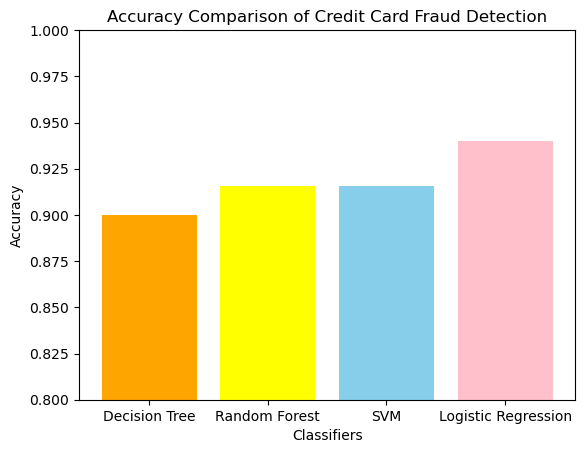

In [44]:
classifiers = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']
accuracies = [0.9, 0.915789, 0.915789,  0.94]
colors = ['orange', 'yellow', 'skyblue', 'pink']

plt.bar(classifiers, accuracies, color=colors)
plt.ylim(0.8, 1.0)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Credit Card Fraud Detection')
plt.show()